# Code and inspiration from
- https://www.tensorflow.org/tutorials/images/cnn

- Test on not rotated data: 99.27% accuracy
- Test on rotated data: 59.25% accuracy

In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

Couldn't import dot_parser, loading of dot files will not be possible.


In [20]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape(len(train_images), 28, 28, 1)
test_images = test_images.reshape(len(test_images), 28, 28, 1)
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Original Images

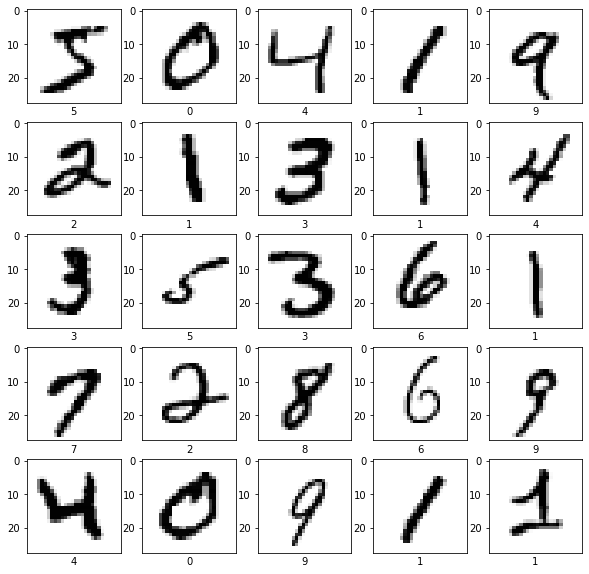

In [6]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## CNN Model

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

## Model Summary

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

## Model Training/Loading

In [21]:


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_path = 'models/CNN_MNIST'
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    history = None
else:
    history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
    
# Save model
#model.save(model_path)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0622 - val_accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0459 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.0249 - val_accuracy: 0.9925
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0247 - val_accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.0287 - val_accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0072 - accuracy: 0.9974 - val_loss: 0.0322 -

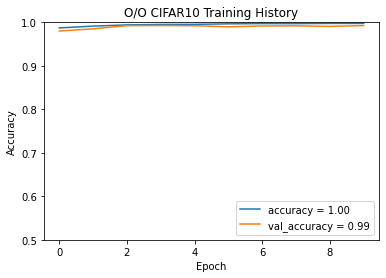

In [22]:
if history:
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    plt.plot(history.history['accuracy'], label=f'accuracy = {train_acc:.2f}')
    plt.plot(history.history['val_accuracy'], label = f'val_accuracy = {val_acc:.2f}')
    plt.title('O/O CIFAR10 Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

### Simple CNN / CIFAR10 /Accurraccy O/O
- trained on Original
- tested on Original
- Accuraccy 99.27%

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0310 - accuracy: 0.9927


### Simple CNN / MNIST / Accurraccy O/A
- trained on Original
- tested on Augmented ~ random (-90, 90) deg. rotations
- Accuraccy: 59%

In [33]:
rotatedTestImages = np.array([tfa.image.rotate(x, np.random.randint(-90, 90) * np.pi / 180, fill_mode='nearest') for x in test_images]

In [34]:
model.evaluate(rotatedTestImages, test_labels,verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 4.3942 - accuracy: 0.5925


[4.39424467086792, 0.5924999713897705]